# Analysez des données de systèmes éducatifs

## 0 - Rappel du sujet

Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université. 

Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansio
 

Mark aimerait explorer les pays avec un fort potentiel de clients pour les services de academy, et comment ce potentiel pourrait évoluer. 


## 1 - Analyse générale des données

Le jeu de données à analyser contient 5 fichiers :
    - EdStatsCountry : ce fichier contient la liste des pays, leur zone géographique, le groupe de revenus.
    - EdStatsCountry-Series : ce fichier donne des indications par pays sur la source des indicateurs, et le périmètre (exemple pour la France, les chiffres inclus la Guyane, la Guadeloupe,..). Il ne sera analysé par la suite.
    - EdStatsData : il s'agit du fichier principal où se trouve les valorisations des indicateurs par pays et par année.
    - EdStatsFootNote : ce fichier indique la source des données de chaque indicateur valorisé par pays. A ce stade de l'analyse, son contenu n'est pas utile pour répondre à la problématique. Il ne sera donc pas détaillé ci-dessous.
    - EdStatsSeries : ce fichier contient la liste exhaustive de tous les indicateurs avec leur description.


### 1.1 - Analyse du fichier EdStatsCountry

In [5]:
#### 1.1.1 - Manipulation du fichier avec python et premiers constats

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

In [7]:
# Charger le fichier de données
countries = pd.read_csv("Documents/Projets/Projet_2/datas_education/EdStatsCountry.csv")
countries.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [8]:
# nombre de pays dans le dataframe
print("Il y a", countries.shape[0], "pays dans le fichier")

Il y a 241 pays dans le fichier


In [9]:
# identifier le nombre de valeurs manquantes par variable
print("Nombre de valeurs manquantes par colonnes")
print(countries.isnull().sum())
# constat :
## Il y a 32 colonnes, mais la plupart des colonnes contiennent des valeurs manquantes
## on peut utiliser le country code, le nom long ou court
## 27 pays sans région

Nombre de valeurs manquantes par colonnes
Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                 

In [10]:
# Identifier les "pays" sans région
mask = countries['Region'].isnull()
paysSansRegion = countries.loc[mask, 'Short Name']
print(paysSansRegion)
# Constat :
## les pays sans région ne sont pas des pays, hormis Nauru (pays d'océanie - East Asia & Pacific) qu'on peut corriger manuellement par la suite, 
## mais ce n'est pas utile, car Nauru est un pays de moins de 10 000 habitants, sur une île isolée.


5                                          Arab World
57              East Asia & Pacific (developing only)
58            East Asia & Pacific (all income levels)
59            Europe & Central Asia (developing only)
60          Europe & Central Asia (all income levels)
63                                          Euro area
68                                     European Union
78                                          Gibraltar
89                                        High income
92             Heavily indebted poor countries (HIPC)
116       Latin America & Caribbean (developing only)
122     Latin America & Caribbean (all income levels)
123      Least developed countries: UN classification
124                                        Low income
127                               Lower middle income
128                               Low & middle income
140    Middle East & North Africa (all income levels)
143                                     Middle income
148      Middle East & North

In [11]:
# Identifier la liste des régions
regions = countries['Region'].unique()
print(regions)
# Constat :
## il y a 7 régions dont voici la liste
## Ces régions pourront être utilisées par la suite

['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' nan 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


In [12]:
# rechercher les doublons
countries.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
236    False
237    False
238    False
239    False
240    False
Length: 241, dtype: bool

In [13]:
mask1 = countries['Short Name'].duplicated(keep=False)
countries.loc[mask1,:]
# Constat :
## Pas de de doublons sur le nom court du pays

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31


In [14]:
# Calculer les effectifs par groupe de revenus

effectifs_grp_revenus = countries['Income Group'].value_counts()
print("Nombre total de pays avec un groupe de revenu : ", effectifs_grp_revenus.sum())

pd.DataFrame({'Income Group':effectifs_grp_revenus.index, 'nb':effectifs_grp_revenus.values})

# Constat :
## il y a des pays qui n'ont pas de groupe de revenus. Lesquels ?
### ce ne sont pas des pays. Ce sont les mêmes que plus haut qui n'ont pas de région

Nombre total de pays avec un groupe de revenu :  214


,Income Group,nb
0,Upper middle income,55
1,Lower middle income,50
2,High income: nonOECD,44
3,Low income,34
4,High income: OECD,31


In [15]:
# Rechercher les pays sans groupe de revenus
mask = countries['Income Group'].isnull()
countries.loc[mask]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,GIB,Gibraltar,Gibraltar,Gibraltar,GI,Gibraltar pound,NaN,NaN,NaN,GI,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.1.2 - Conclusions

On pourra constituer un dataFrame avec les colonnes suivantes de ce fichier :
    - Le short Name
    - Region
    - Income Group
Ce dataFrame permettra d'avoir une liste exhaustive des pays étudiés, de faire des regaroupements par niveau de revenus et par région.

Il faudra corriger manuellement la région et le groupe de revenus du pays Nauru.

### 1.2 - Analyse du fichier EdStatsSeries

#### 1.2.1 - Manipulation du fichier avec python et premiers constats

In [18]:
series = pd.read_csv("Documents/Projets/Projet_2/datas_education/EdStatsSeries.csv")
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# nombre de series dans le dataframe
print("Il y a", series.shape[0], "indicateurs / series dans le dataframe")

Il y a 3665 indicateurs / series dans le dataframe


In [20]:
# identifier les outliers / valeurs extrêmes / doublons éventuels
series.describe(include="all")
# Constat :
## Le Topic semble être un regroupement d'indicateurs, comme une thématique. Il y en 37 unique
## Il n'y a pas d'indicateurs en double (count = 3665 et unique = 3665)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
count,3665,3665,3665,2156,3665,0.0,99,314,552,47,14,0.0,14,3665,23,3,215,0.0,0.0,0.0,0.0
unique,3665,37,3665,1169,2060,NaN,1,4,14,3,9,NaN,8,31,2,1,1,NaN,NaN,NaN,NaN
top,BAR.NOED.1519.FE.ZS,Learning Outcomes,Barro-Lee: Percentage of female population age...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,Annual,Projections (2010 to 2100),EGRA,Weighted average,Data should be used cautiously because of diff...,NaN,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN
freq,1,1046,1,215,215,NaN,99,308,403,31,3,NaN,3,1269,20,3,215,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# identifier la liste des Topics
series['Topic'].unique()
# Constat
## on peut regrouper les indicateurs par thèmes
## on peut filtrer d'abord les Topics/Thèmes pertinents pour notre analyse avant d'aller dans le détail des indicateurs ?
## il faut vérifier si tous les indicateurs sont rattachés à un Topic

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [22]:
# Vérifier s'il y a des indicateurs sans Topic
mask = series['Topic'].isnull()
nbIndicateursSansPays = series.loc[mask, 'Indicator Name'].sum()
print("nombre d'indicateurs/series sans Topic/Thème :", nbIndicateursSansPays)
# Constat
## Tous les indicateurs sont rattachés à un thème

nombre d'indicateurs/series sans Topic/Thème : 0


In [23]:
# identifier le nombre de valeurs manquantes par variable
print("Nombre de valeurs manquantes par variable")
print(series.isnull().sum())
# Constat
## on ne peut pas exploiter l'unité de mesure - aucune donnée renseignée
## on peut utiliser uniquement Series Code, Topic Indicator Name, et Long definition

Nombre de valeurs manquantes par variable
Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64


#### 1.2.2 - Conclusions

Ce fichier permet simplement de connaître la liste exhaustive des indicateurs, et leur définition pour avoir plus de précisions. Etant donné qu'on verra par la suite qu'il y a très peu d'indicateurs à retenir dans notre contexte, on n'utilisera pas le Topic (regroupement par thème des indicateurs).


### 1.3 - Analyse du fichier EdStatsData

#### 1.3.1 - Manipulation du fichier avec python et premiers constats

In [26]:
data = pd.read_csv("Documents/Projets/Projet_2/datas_education/EdStatsData.csv")
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
print("nbre de lignes : ", data.shape[0])

nbre de lignes :  886930


In [28]:
# Rechercher s'il y a des pays dans le fichier data qui ne sont pas dans le fichier countries

mask = ~data['Country Name'].isin(countries.iloc[:, 1])
data.loc[mask, 'Country Name'].unique()

array(['East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Bahamas, The', 'British Virgin Islands', 'Brunei Darussalam',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Curacao',
       'Egypt, Arab Rep.', 'Faroe Islands', 'Gambia, The',
       'Iran, Islamic Rep.', 'Korea, Dem. People’s Rep.', 'Korea, Rep.',
       'Macedonia, FYR', 'Micronesia, Fed. Sts.', 'Russian Federation',
       'Sao Tome and Principe', 'Venezuela, RB', 'Virgin Islands (U.S.)',
       'Yemen, Rep.'], dtype=object)

In [29]:
# identifier le nombre de valeurs manquantes par variable
sf = data.isnull().sum()
print(sf)
# Constat :
## Les années vont de 1970 à 2100. De 2020 à 2100 doivent être des projections
## on voit qu'il y a beaucoup de valeurs manquantes pour chaque année

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64


In [30]:
# Afficher le pourcentage de valeurs manquantes par année
sf = data.isnull().sum() * 100 / data.shape[0]
print(sf.iloc[4:])
# Constat :
## on voit que 2005 et 2010 ont la meilleure couverture (79% et 72V %) 

1970            91.849639
1971            95.993258
1972            95.984012
1973            95.992356
1974            95.971497
                  ...    
2085            94.200670
2090            94.200670
2095            94.200670
2100            94.200670
Unnamed: 69    100.000000
Length: 66, dtype: float64


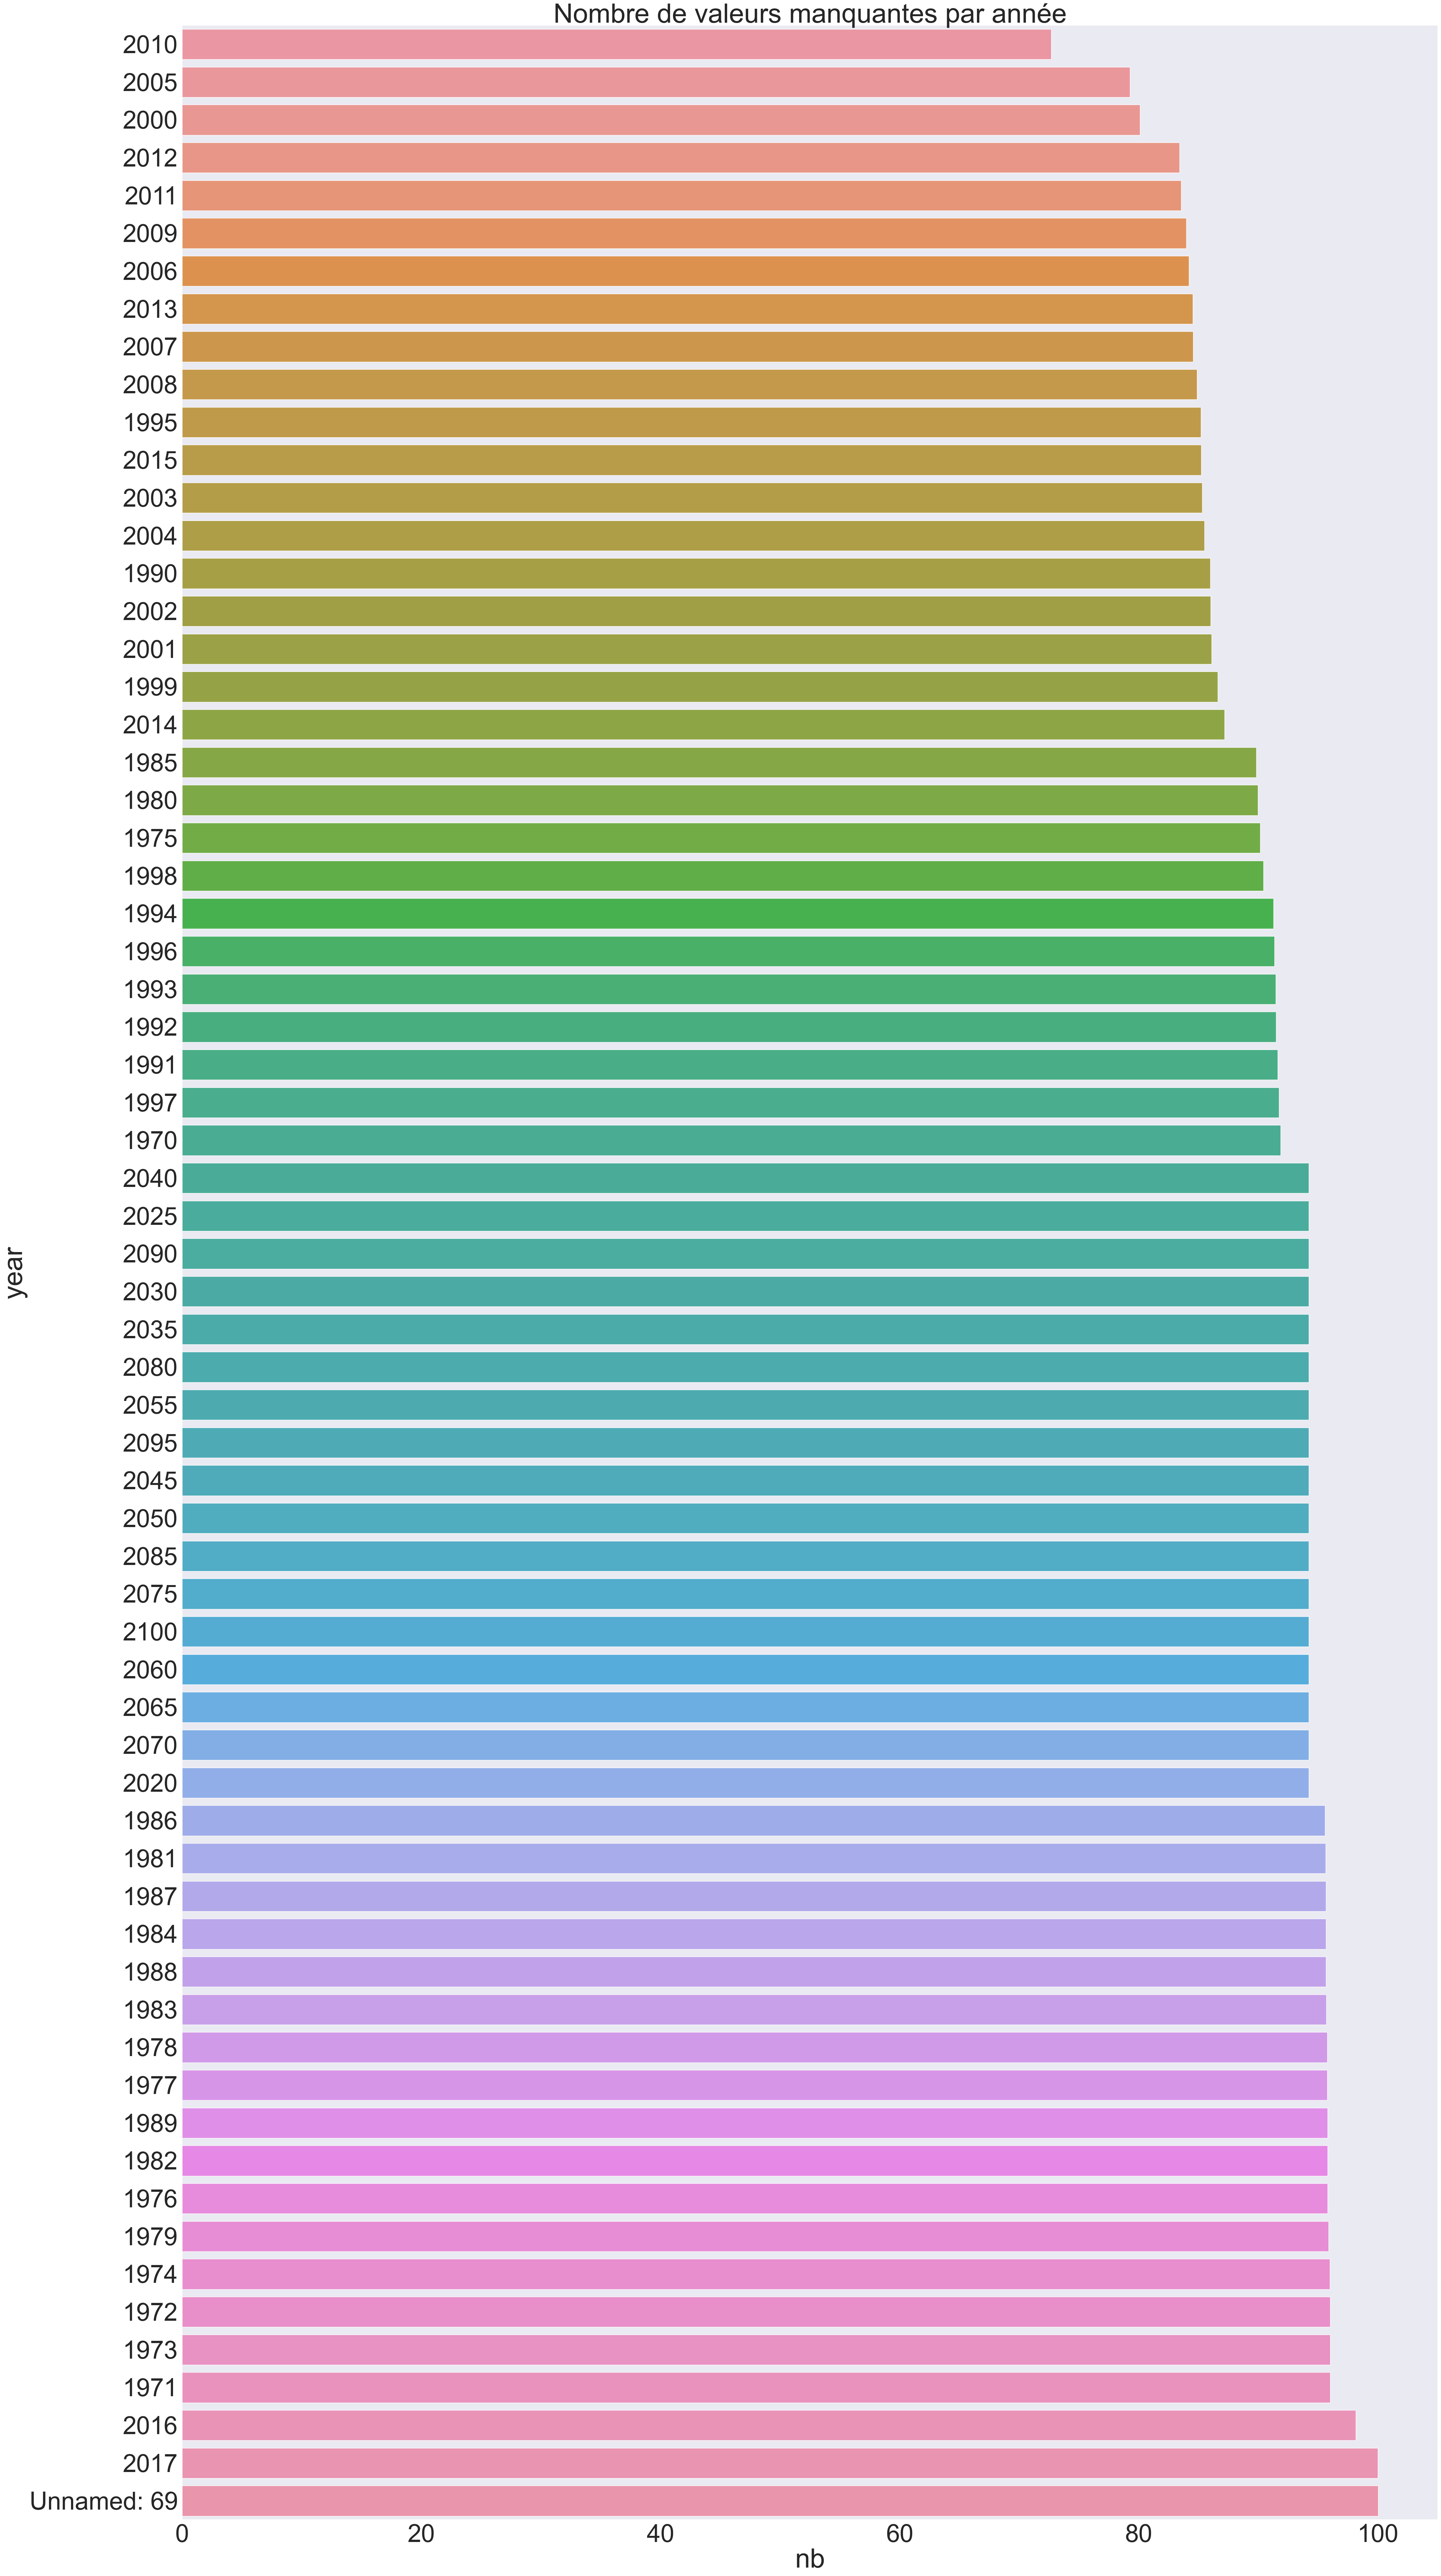

In [178]:
# Rechercher les années les mieux valorisées tout indicateur confondu

data_years_count = pd.DataFrame({'year':sf.index, 'nb':sf.values})
data_years_count_tri = data_years_count.sort_values(['nb'], ascending=[True])
data_years_count_tri.head()

plt.figure(figsize=(50,100))
sns.barplot(data=data_years_count_tri.iloc[4:70,:], y='year', x='nb', errorbar=None)
sns.set_palette('pastel')
sns.set(font_scale=5)

plt.title("Nombre de valeurs manquantes par année")
plt.ylabel("year")
plt.xlabel("nb")
#plt.xlim(0,100)
#plt.xticks([0, 25, 50, 75, 100])
plt.grid(axis="x")

plt.show()

# Constat
# 2005 et 2010 sont les mieux valorisées

In [31]:
# rechercher les doublons country_name / indicator_name
doublons = data.duplicated(subset = ['Country Name', 'Indicator Name'])
totalDoublons = 0
for doublon in doublons:
    if doublon == True:
        totalDoublons += 1
print('fin, total doublons = ', totalDoublons)        
# Constat
## pas de doublons pays / indicateur

fin, total doublons =  0


Identifier la ou les années à prendre en compte dans l'analyse

In [32]:
# Calculer le nombre de valeurs de chaque indicateur par année, tout pays confondus

data_by_indicators_count = data.groupby('Indicator Name').count().reset_index()
data_by_indicators_count

,Indicator Name,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,4,29,29,25,29,22,27,31,31,32,25,30,24,24,27,25,29,25,18,24,21,26,30,32,39,33,32,29,42,96,95,101,101,94,101,105,98,104,102,112,106,107,102,99,85,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,2,24,25,22,24,20,22,27,26,26,21,27,24,24,25,24,26,21,15,22,17,23,25,27,33,28,27,28,40,93,93,95,96,89,97,101,95,101,100,110,103,106,101,98,84,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,2,24,24,22,24,20,22,27,26,26,21,26,23,23,25,24,26,20,15,21,17,22,24,27,32,27,26,27,40,93,93,95,96,89,97,101,95,101,100,110,103,106,101,98,84,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,2,24,24,22,24,20,22,27,26,26,21,26,23,23,25,24,26,20,15,21,17,22,24,27,32,27,26,27,40,93,93,95,96,89,97,101,95,101,100,110,103,106,101,98,84,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Adjusted net enrolment rate, primary, both sex...",242,242,242,15,15,17,18,19,21,22,22,22,22,22,22,22,22,22,23,24,24,24,24,24,24,25,25,25,25,25,25,25,145,148,141,149,148,147,157,150,157,157,163,156,157,161,152,155,119,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,"Youth illiterate population, 15-24 years, male...",242,242,242,3,0,0,0,0,5,8,1,2,7,19,18,7,2,4,15,14,13,14,21,27,33,19,14,22,17,20,15,17,19,55,40,30,22,30,33,39,47,44,45,60,70,54,42,49,31,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3661,"Youth literacy rate, population 15-24 years, b...",242,242,242,3,0,0,0,0,5,8,1,2,7,20,19,7,2,4,23,22,21,22,29,35,41,27,22,31,25,28,23,25,27,63,48,38,30,38,40,46,54,51,52,67,77,61,49,56,32,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3662,"Youth literacy rate, population 15-24 years, f...",242,242,242,3,0,0,0,0,5,8,1,2,7,20,18,7,2,4,23,22,21,22,29,35,41,27,22,31,25,28,23,25,27,63,48,38,30,38,40,46,54,51,52,67,77,61,49,56,32,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3663,"Youth literacy rate, population 15-24 years, g...",242,242,242,3,0,0,0,0,5,8,1,2,7,20,18,7,2,4,23,22,21,22,29,35,41,27,22,31,25,28,23,25,27,63,48,38,30,38,40,46,54,51,52,67,77,61,49,56,32,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# On peut aussi retirer les indicateurs qui distinguent les 'female' et les 'males' 
# pour se concentrer sur la population totale, quelque soit le sexe

mask = ~(data_by_indicators_count['Indicator Name'].str.contains('female') | data_by_indicators_count['Indicator Name'].str.contains('male'))
data_by_indicators_count_without_sex = data_by_indicators_count.loc[mask]

print("Nombre d'indicateurs sans female ou male : ", data_by_indicators_count_without_sex.shape[0])

data_by_indicators_count_without_sex.head()

Nombre d'indicateurs sans female ou male :  2458


,Indicator Name,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,4,29,29,25,29,22,27,31,31,32,25,30,24,24,27,25,29,25,18,24,21,26,30,32,39,33,32,29,42,96,95,101,101,94,101,105,98,104,102,112,106,107,102,99,85,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,2,24,24,22,24,20,22,27,26,26,21,26,23,23,25,24,26,20,15,21,17,22,24,27,32,27,26,27,40,93,93,95,96,89,97,101,95,101,100,110,103,106,101,98,84,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Adjusted net enrolment rate, primary, both sex...",242,242,242,15,15,17,18,19,21,22,22,22,22,22,22,22,22,22,23,24,24,24,24,24,24,25,25,25,25,25,25,25,145,148,141,149,148,147,157,150,157,157,163,156,157,161,152,155,119,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,"Adjusted net enrolment rate, primary, gender p...",242,242,242,26,55,59,61,58,56,58,61,72,70,61,79,79,81,77,75,85,77,77,75,74,71,76,76,85,81,84,78,79,131,128,118,119,125,126,135,136,142,142,144,135,140,141,130,120,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,"Adjusted net enrolment rate, upper secondary, ...",242,242,242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,24,33,25,32,33,39,37,40,42,46,56,57,57,53,100,90,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [212]:
# Si on prend 2010 comme année de repère car c'est celle qui est la plus valorisée
# Quelles seraient les indicateurs les mieux valorisés pour 2010 ?
# pd.set_option('display.max_rows', 10)

mask = ~data_by_indicators_count_without_sex['2010'].isnull()
data_by_indicators_count_without_sex_sort = data_by_indicators_count_without_sex.loc[mask, ['Indicator Name', '2010']].sort_values('2010', ascending = False)
display(data_by_indicators_count_without_sex_sort)

# J'ai ensuite balayé visuellement la liste triée pour sélectionner des indicateurs pertinents pour notre analyse

,Indicator Name,2010
2533,"Population, total",240
2307,Population growth (annual %),240
1245,GDP per capita (current US$),228
1243,GDP at market prices (current US$),228
1242,GDP at market prices (constant 2005 US$),227
...,...,...
2040,PISA: Male 15-year-olds by mathematics profici...,0
2039,PISA: Male 15-year-olds by mathematics profici...,0
2038,PISA: Male 15-year-olds by mathematics profici...,0
2037,PISA: Male 15-year-olds by mathematics profici...,0


#### 1.3.2 - Conclusions

Les années retenues sont 2005 et 2010 car se sont celles les mieux valorisées pour tous les indicateurs, et particulièrement ceux sélectionnés.

Liste des indicateurs dans le fichier data retenus sont :

In [45]:
#   - GDP per capita (current US$)
#	- Personal computers (per 100 people)
#	- Internet users (per 100 people)
#		>> moyens dont disposent les élèves pour étudier en ligne
	
#	- Enrolment in secondary education, private institutions, both sexes (number)
#	- Enrolment in tertiary education, ISCED 5 programmes, both sex(number)
#		>> nombre d'élèves dont les parents peuvent financer leurs études dans le privé

#	- Population of the official age for primary education, both sexes (number) 
#	- Population of the official age for secondary education, both sexes (number)
#	- Population of the official age for tertiary education, both sexes (number)
#		>> permet de voir l'évolutivité de la jeune population scolarisée dans le temps, et à comparer avec l'évolution de la population totale

#	- Population, total

#   - Population growth (annual %)
#   - Unemployment, total (% of total labor force) (modeled ILO estimate)
#   - Gross outbound enrolment ratio, all regions, both sexes (%)

## 2 - Sélectionner les données pertinentes

### 2.1 - DataFrame country_selected

In [103]:
# On crée un dataframe sans les pays sans région vus précédemment, avec les 3 colonnes qui nous intéressent
mask = ~countries['Region'].isnull()
countries_selected = countries.loc[mask, ['Short Name', 'Region', 'Income Group']].reset_index()
print("Il y a", countries_selected.shape[0], "pays dans le dataFrame")
countries_selected.head()

Il y a 214 pays dans le dataFrame


,index,Short Name,Region,Income Group
0,0,Aruba,Latin America & Caribbean,High income: nonOECD
1,1,Afghanistan,South Asia,Low income
2,2,Angola,Sub-Saharan Africa,Upper middle income
3,3,Albania,Europe & Central Asia,Upper middle income
4,4,Andorra,Europe & Central Asia,High income: nonOECD


### 2.2 - DataFrame data_selected

In [256]:
# on crée une liste avec tous indicateurs retenus
list_selected = [
    "GDP per capita (current US$)",
    "Personal computers (per 100 people)",
    "Internet users (per 100 people)",
    "Population, total",
    "Population of the official age for primary education, both sexes (number)",
    "Population of the official age for secondary education, both sexes (number)",
    "Population of the official age for tertiary education, both sexes (number)",
    "Enrolment in secondary education, private institutions, both sexes (number)",
    "Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)",
    "Population growth (annual %)",
    "Unemployment, total (% of total labor force)",
    "Gross outbound enrolment ratio, all regions, both sexes (%)"
]

In [258]:
# on crée un échantillon de "data" avec uniquement les indicateurs de la liste ci-dessus, et les années 2005 et 2010
mask_data_selected = data['Indicator Name'].isin(list_selected)
data_selected = data.loc[mask_data_selected, ['Country Name', 'Indicator Name', '2005', '2010']].reset_index()
data_selected.shape[0]

2904

In [260]:
# on retire de ce dataframe les 27 "pays" qui n'en sont pas
mask = ~data_selected['Country Name'].isin(paysSansRegion)
data_selected = data_selected.loc[mask]
print("Il y a donc", len(data_selected['Country Name'].unique()), "pays représentés dans ce fichier")
print("Ces pays ont", data_selected.shape[0] / len(data_selected['Country Name'].unique()), "indicateurs chacun")

Il y a donc 225 pays représentés dans ce fichier
Ces pays ont 12.0 indicateurs chacun


# 3 - Créer un dataframe dans le but de mener une analyse

In [ ]:
# ajouter une colonne 'année' et passer les indicateurs en colonne (revert du dataframe)
